In [44]:
import re
import ast
from collections import defaultdict
from itertools import combinations, product
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.matplotlib.rcParams['figure.figsize'] = (12, 6)

In [11]:
% cd /Users/mdymshits/cna-course/out/
%ls -1 | grep 38

/Users/mdymshits/cna-course/out
1514456330.38_G.csv
1514456330.38_test.txt
1514456330.38_train.txt
1514456330.38_vis.png


## Functions

In [12]:
fname = '1514456330.38_train.txt'

In [49]:
def read_outputs(fname):
    """read inputs and outputs from file into 2 lists"""
    vectors = []
    with open(fname) as f:
        pattern = "\[\d+\, \d+\, \d+\, \d+\, \d+\]"
        strings = re.findall(pattern, f.read())
    for v in strings:
        vectors.append(ast.literal_eval(v))
    inputs = vectors[::2]
    outputs = vectors[1::2]
    return inputs, outputs

def score(nodes, graph_weights):
    """returns list of scores per lists of outputs"""
    total_cor = []
    for out in nodes:
        val_per_output = 0
        for n1, n2 in combinations(out, r=2):
            corr = graph_weights['_'.join([str(n1), str(n2)])]
            val_per_output += corr
        total_cor.append(val_per_output)
    return total_cor


def score_io(inputs, outputs, graph_weights):
    """returns list of scores per lists of outputs"""
    total_cor = []
    for i,o in zip(inputs, outputs):
        print len(i), len(o)
        val_per_output = 0
        for n1, n2 in product(i,o):
            corr = graph_weights['_'.join([str(n1), str(n2)])]
            val_per_output += corr
#             print n1, n2, corr, val_per_output
#             print total_cor
        total_cor.append(-val_per_output)
    return total_cor


In [78]:
!wc -l 1514456330.38_G.csv

     312 1514456330.38_G.csv


In [79]:
G=nx.read_edgelist("1514456330.38_G.csv", delimiter=',', nodetype=int, \
                   data=(('weight',float),), create_using=nx.Graph())

In [26]:
graph_weights = defaultdict(int)
for n1,n2,c in G.edges(data = True):
#     print n1, n2, c
#     print str(n1), str(n2)
#     if c['weight'] == 1:
    graph_weights['_'.join([str(n1), str(n2)])] = c['weight']
    graph_weights['_'.join([str(n2), str(n1)])] = c['weight']

In [38]:
type(graph_weights['133_168'])

float

In [30]:
fname_train = '1514456330.38_train.txt'  
fname_test = '1514456330.38_test.txt'

inputs_train, outputs_train = read_outputs(fname_train)
inputs_test, outputs_test = read_outputs(fname_test)


In [ ]:
score_train_i = score(inputs_train, graph_weights)
score_train_o = score(outputs_train, graph_weights)
score_train_io = score_io(inputs_train, outputs_train, graph_weights)

score_test_i = score(inputs_test, graph_weights)
score_test_o = score(outputs_test, graph_weights)
score_test_io = score_io(inputs_test, outputs_test, graph_weights)

In [ ]:
len(nodes_train), len(nodes_test)

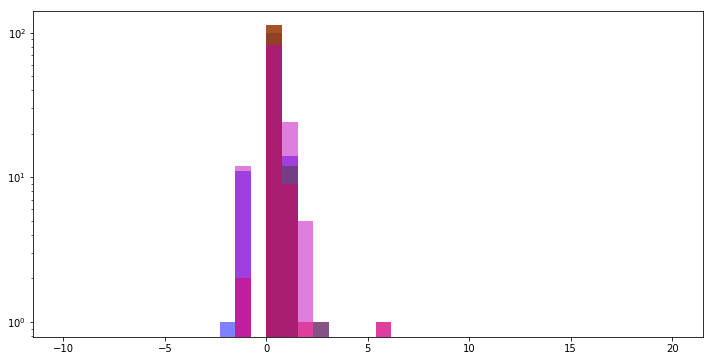

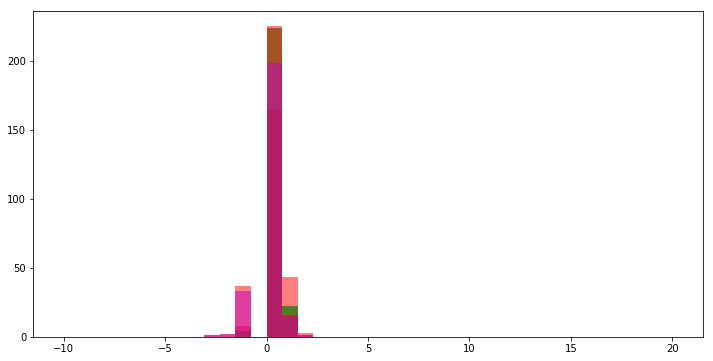

In [100]:
bins = np.linspace(-10,20,40)


plt.hist(score_train_io, bins=bins, alpha=.5, color='b', log=True);
plt.hist(score_train_i, bins=bins, alpha=.7, color='g');
plt.hist(score_train_o, bins=bins, alpha=.5, color='r');

train_all = np.array(score_train_io) + \
            np.array(score_train_i) + np.array(score_train_o)
plt.hist(train_all, bins=bins, alpha=.5, color='m');

plt.figure()

test_all = np.array(score_test_io) + \
            np.array(score_test_i) + np.array(score_test_o)
    
plt.hist(test_all, bins=bins, alpha=.5, color='r');

plt.hist(score_test_i, bins=bins, alpha=.7, color='g');
plt.hist(score_test_o, bins=bins, alpha=.5, color='r');
plt.hist(score_test_io, bins=bins, alpha=.5, color='m');

### draft - not relevant


In [87]:
gg = np.loadtxt("1514456330.38_G.csv", delimiter=',', dtype=int).tolist()

In [89]:
T = nx.Graph()

for line in gg:
    
    T.add_edge(line[0], line[1], weight=line[2])

In [94]:
len(T.edges(data=True))

312

In [96]:
len(G.edges(data=True))

312